In [2]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

names = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain = xTrain/255.
xTest = xTest/255.

print(np.shape(xTrain))
print(np.shape(xTest))

print(np.shape(yTrain))
print(np.shape(yTest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


5733
cat
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


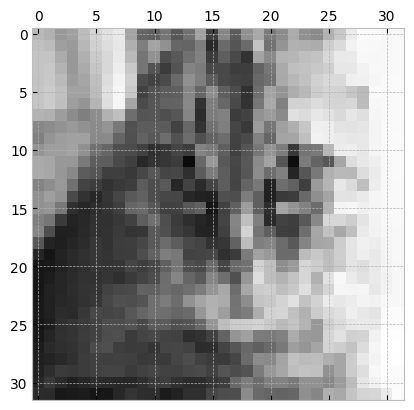

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import random 
style.use(style.available[4])

x = random.randrange(0,10000)

print(x)
print(names[np.argmax(yTrain[x])])
print(yTrain[x])

plt.matshow(xTrain[x])

In [4]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.preprocessing import image

weightDecay = 1e-4

#model -- VGG-3 Blocks with dropouts
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay), input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(weightDecay)))
model.add(Dense(10, activation='softmax'))

In [5]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [6]:
# compile
from keras.optimizers import SGD
from keras.optimizers import rmsprop
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
from keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15
)

trainGenerator = trainGen.flow(
    xTrain,
    yTrain,
    batch_size=64
)

testGen = ImageDataGenerator()

testGenerator = testGen.flow(
    xTest,
    yTest,
    batch_size=64
)

In [8]:
def LRChange(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    if epoch > 125:
        lrate = 0.0001
    if epoch > 150:
      lrate = 0.00005
    if epoch > 175:
      lrate = 0.00003
    return lrate

In [1]:
from keras.models import load_model
from keras.callbacks import LearningRateScheduler
from keras.models import load_model


optimizer = Adam(lr=0.00005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

BATCH_SIZE = 64
EPOCHS = 50

history = model.fit_generator(trainGenerator,
                    steps_per_epoch=np.shape(xTrain)[0] // BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=testGenerator)

NameError: ignored

In [ ]:
from keras.models import load_model
from keras.callbacks import LearningRateScheduler
from keras.models import load_model


optimizer = Adam(lr=0.00005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

BATCH_SIZE = 64
EPOCHS = 25

history = model.fit_generator(trainGenerator,
                    steps_per_epoch=np.shape(xTrain)[0] // BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=testGenerator)

<ipython-input-12-86549e4dca0a>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(trainGenerator,


Epoch 1/25
781/781 [==============================] - 468s 596ms/step - loss: 2.2690 - accuracy: 0.2495 - val_loss: 1.8105 - val_accuracy: 0.3840
Epoch 2/25
781/781 [==============================] - 463s 593ms/step - loss: 1.8297 - accuracy: 0.3564 - val_loss: 1.6905 - val_accuracy: 0.4246
Epoch 3/25
781/781 [==============================] - 465s 596ms/step - loss: 1.6856 - accuracy: 0.4097 - val_loss: 1.6255 - val_accuracy: 0.4566
Epoch 4/25
781/781 [==============================] - 461s 591ms/step - loss: 1.5939 - accuracy: 0.4420 - val_loss: 1.7766 - val_accuracy: 0.4398
Epoch 5/25
781/781 [==============================] - 462s 592ms/step - loss: 1.5128 - accuracy: 0.4737 - val_loss: 1.5518 - val_accuracy: 0.4864
Epoch 6/25
781/781 [==============================] - 464s 594ms/step - loss: 1.4516 - accuracy: 0.4964 - val_loss: 1.5410 - val_accuracy: 0.4957
Epoch 7/25
781/781 [==============================] - 471s 603ms/step - loss: 1.3977 - accuracy: 0.5178 - val_loss: 1.3987 -

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0







In [5]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model with appropriate loss, optimizer, and metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [7]:
# Train the model on the training data
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 96s 60ms/step - loss: 1.5445 - accuracy: 0.4370 - val_loss: 1.2524 - val_accuracy: 0.5522
Epoch 2/20
1563/1563 [==============================] - 101s 64ms/step - loss: 1.1868 - accuracy: 0.5785 - val_loss: 1.1363 - val_accuracy: 0.5932
Epoch 3/20
1563/1563 [==============================] - 91s 59ms/step - loss: 1.0414 - accuracy: 0.6322 - val_loss: 1.0171 - val_accuracy: 0.6344
Epoch 4/20
1563/1563 [==============================] - 91s 59ms/step - loss: 0.9520 - accuracy: 0.6647 - val_loss: 0.9869 - val_accuracy: 0.6510
Epoch 5/20
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8858 - accuracy: 0.6882 - val_loss: 0.9342 - val_accuracy: 0.6787
Epoch 6/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8239 - accuracy: 0.7123 - val_loss: 0.9181 - val_accuracy: 0.6753
Epoch 7/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7767 - accuracy: 0.7286 - val_loss: 0.9436 

In [8]:
# Evaluate the accuracy of the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print("Test accuracy:", test_acc)

# Generate predictions on the test data
y_pred = model.predict(test_images)

# Convert predictions from probabilities to class labels
y_pred = tf.argmax(y_pred, axis=1)

# Generate classification report
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(test_labels, y_pred, target_names=target_names))

313/313 - 4s - loss: 1.0614 - accuracy: 0.7051 - 4s/epoch - 14ms/step
Test accuracy: 0.7050999999046326
313/313 [==============================] - 6s 20ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.73      0.73      1000
  automobile       0.80      0.84      0.82      1000
        bird       0.57      0.63      0.60      1000
         cat       0.54      0.43      0.48      1000
        deer       0.62      0.72      0.67      1000
         dog       0.62      0.62      0.62      1000
        frog       0.82      0.73      0.77      1000
       horse       0.77      0.73      0.75      1000
        ship       0.79      0.81      0.80      1000
       truck       0.80      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

